# Setup

In [11]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import Data

In [17]:
address = '/Users/foppong/Desktop/Data_Analyses/Projects/Waiters_Tips/tips.csv'

tips_data = pd.read_csv(address)

In [18]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [22]:
tips_data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [20]:
tips_data['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [23]:
tips_data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [24]:
tips_data['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [25]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


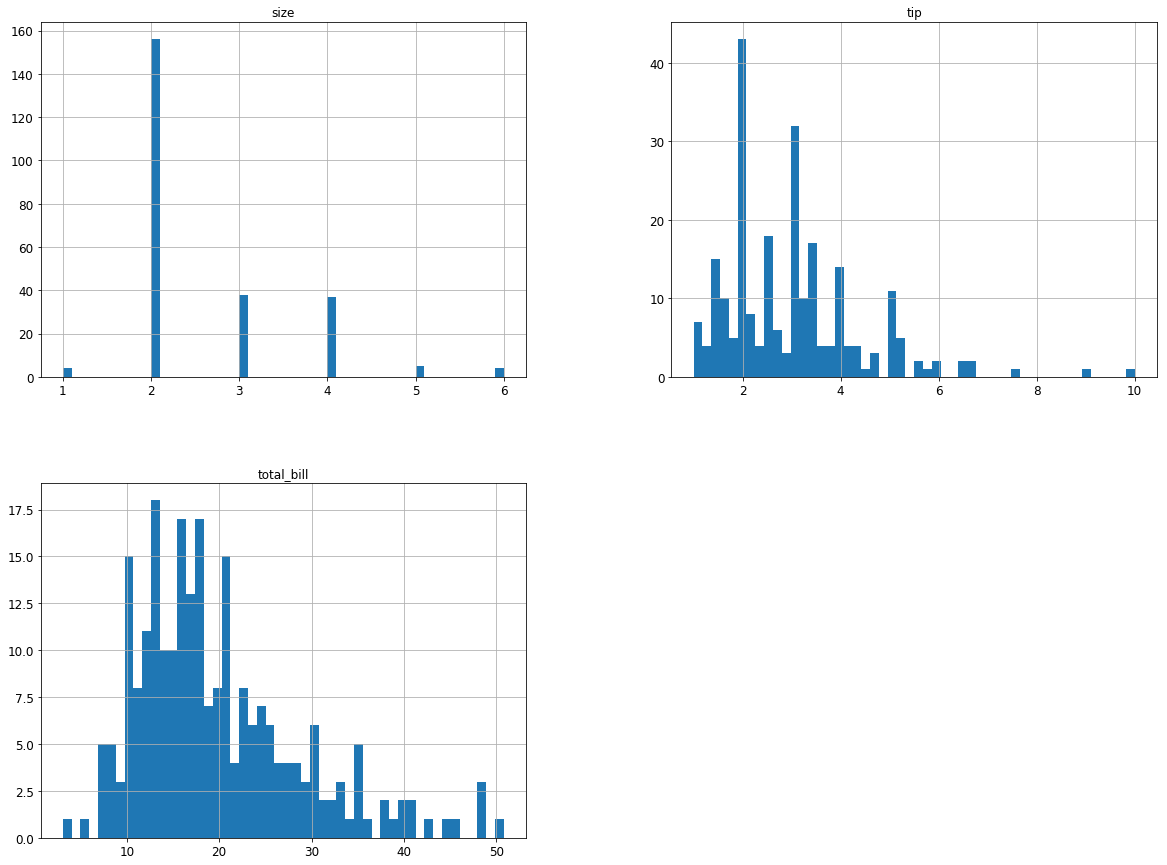

In [26]:
tips_data.hist(bins=50, figsize=(20,15))
plt.show()

### Create a Test Set

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(tips_data, test_size=0.2, random_state=42)

In [28]:
test_set.head()

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2


In [70]:
print(len(train_set), "train +", len(test_set), "test")

195 train + 49 test


# Discover and Visualize the Data to Gain Insights

In [44]:
# Create a copy of training set for playing around with
tips_data = train_set.copy()

In [45]:
corr_matrix = tips_data.corr()

In [1]:
# Lets check corrleation to total_bill and size
corr_matrix["tip"].sort_values(ascending=False)

NameError: name 'corr_matrix' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ccbb090>,
      dtype=object)

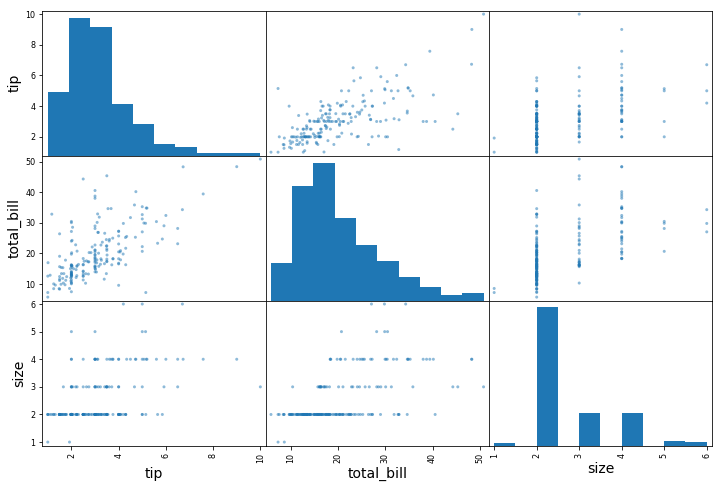

In [48]:
# Lets view correlations via a scatter matrix
from pandas.plotting import scatter_matrix

attributes = ["tip", "total_bill", "size"]
scatter_matrix(tips_data[attributes], figsize=(12, 8))

# Prepare the Data for Machine Learning Algorithms

In [85]:
tips = train_set.drop("tip", axis=1) # drop labels for training set, makes a copy of the dataset
tips_labels = train_set["tip"].copy()

### Data Cleaning

In [86]:
# Drop text attributes to allow for additional processing (e.g., feature scaling)
tips_num = tips.drop(['sex', 'smoker','day','time'], axis=1)
tips_num.head()

,total_bill,size
228,13.28,2
208,24.27,2
96,27.28,2
167,31.71,4
84,15.98,2


### Handling Text and Categorical Attributes

In [146]:
# Let's preprocess the categorical input features
categories_list = tips[['sex','smoker','day','time']]

In [147]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

In [148]:
cat_encoder = OneHotEncoder(sparse=False)

encoded_categories = cat_encoder.fit_transform(categories_list)

#sex_category_1hot = cat_encoder.fit_transform(sex_category)
#smoker_category_1hot = cat_encoder.fit_transform(smoker_category)
#day_catgory_1hot = cat_encoder.fit_transform(day_catgory)
#time_category_1hot = cat_encoder.fit_transform(time_category)

In [184]:
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

### Transform Pipeline

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()), # scaling the features
    ])

tips_num_tr = num_pipeline.fit_transform(tips_num)
tips_num_tr

array([[-7.93061551e-01, -6.12140682e-01],
       [ 4.63227437e-01, -6.12140682e-01],
       [ 8.07306586e-01, -6.12140682e-01],
       [ 1.31370879e+00,  1.51942062e+00],
       [-4.84419124e-01, -6.12140682e-01],
       [-8.31839702e-02, -6.12140682e-01],
       [-8.21639553e-01, -6.12140682e-01],
       [-1.48236297e+00, -6.12140682e-01],
       [-2.74085027e-01, -6.12140682e-01],
       [-3.38099752e-01,  4.53639970e-01],
       [-5.17569607e-01,  4.53639970e-01],
       [ 1.10108845e+00,  2.58520127e+00],
       [-3.32384151e-01, -6.12140682e-01],
       [ 3.55774147e-01, -6.12140682e-01],
       [-4.51268642e-01, -6.12140682e-01],
       [ 1.40691704e-03, -6.12140682e-01],
       [ 8.02822038e-02, -6.12140682e-01],
       [-5.95301774e-01, -6.12140682e-01],
       [-1.48236297e+00, -1.67792133e+00],
       [ 7.28431299e-01,  4.53639970e-01],
       [ 4.91805439e-01,  4.53639970e-01],
       [-5.11766075e-02,  1.51942062e+00],
       [ 9.06758034e-01,  2.58520127e+00],
       [-3.

In [151]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [152]:
num_attribs = list(tips_num)
cat_attribs = ["sex", "smoker", "day", "time"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

tips_prepared = full_pipeline.fit_transform(tips)

In [153]:
tips_prepared

array([[-0.79306155, -0.61214068,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.46322744, -0.61214068,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.80730659, -0.61214068,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.65383098, -0.61214068,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.64749986, -0.61214068,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.75289699,  0.45363997,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [154]:
# Check if shape matches test count from earlier
tips_prepared.shape

(195, 12)

# Select and Train a Model

### Train and Evaluating on the Training Set

#### Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(tips_prepared, tips_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
# let's try the full preprocessing pipeline on a few training instances
some_data = tips.iloc[:5]
some_labels = tips_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [2.29503004 3.14342689 3.6142584  4.64230595 2.65174081]


In [157]:
# compare against actual values:
print("Labels:", list(some_labels))

Labels: [2.72, 2.03, 4.0, 4.5, 2.03]


In [158]:
# Let's measure this regression model's RMSE on the whole training set using SciKit-Learn's mean_squared_error fn
from sklearn.metrics import mean_squared_error

tips_predictions = lin_reg.predict(tips_prepared)
lin_mse = mean_squared_error(tips_labels, tips_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.0491326804711238

#### Decision Tree

In [159]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(tips_prepared, tips_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [160]:
tips_predictions = tree_reg.predict(tips_prepared)
tree_mse = mean_squared_error(tips_labels, tips_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(tips_prepared, tips_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [162]:
tips_predictions = forest_reg.predict(tips_prepared)
forest_mse = mean_squared_error(tips_labels, tips_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4603249075520687

### Better Evaluation Using Cross Validation

In [163]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [164]:
# Cross validate linear regression model
lin_scores = cross_val_score(lin_reg, tips_prepared, tips_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.19726118 1.0918129  1.11373482 1.23418763 0.73296815 1.1286172
 0.895317   1.11666592 1.26877463 1.22056651]
Mean: 1.0999905916266228
Standard deviation: 0.15762204744501931


In [165]:
# Cross validate decision tree model <performs worse since it's overfitting>
tree_scores = cross_val_score(tree_reg, tips_prepared, tips_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [1.43540238 1.7503671  1.40079085 1.1093737  0.90024997 1.39189572
 1.22266103 1.96820918 1.44727693 1.46689432]
Mean: 1.409312117919659
Standard deviation: 0.28608461495925364


In [166]:
# Cross validate random forest model <performs the best>
forest_scores = cross_val_score(forest_reg, tips_prepared, tips_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1.16030446 0.7781495  1.14374702 1.24191193 0.58110051 1.20048411
 0.90086482 1.16781167 1.33166498 1.23609717]
Mean: 1.0742136189229226
Standard deviation: 0.22768967541137797


In [167]:
# NOTE: Scores on the training set are still much lower than on the validation sets, meaning that the model is still
# overfitting the training set

# Fine-Tune Your Model

### Grid Search

In [168]:
# Grid Search - process evaluates all the possible combinations of hyperparameters values, using cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(tips_prepared, tips_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{u'n_estimators': [3, 10, 30], u'max_features': [2, 4, 6, 8]}, {u'n_estimators': [3, 10], u'max_features': [2, 3, 4], u'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'neg_mean_squared_error', verbose=0)

In [169]:
# Best hyperparameter combination found
grid_search.best_params_

{u'max_features': 2, u'n_estimators': 10}

In [170]:
# Get the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [201]:
# Let's look at the score of each hyperparameter combination tested during the grid search:
# Note best is {u'max_features': 2, u'n_estimators': 10}
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.1896424562822117 {u'max_features': 2, u'n_estimators': 3}
1.0909217791414416 {u'max_features': 2, u'n_estimators': 10}
1.1017650400238714 {u'max_features': 2, u'n_estimators': 30}
1.2600276983343663 {u'max_features': 4, u'n_estimators': 3}
1.1579891456911249 {u'max_features': 4, u'n_estimators': 10}
1.093802035245726 {u'max_features': 4, u'n_estimators': 30}
1.2724732630307818 {u'max_features': 6, u'n_estimators': 3}
1.153578250266179 {u'max_features': 6, u'n_estimators': 10}
1.1035262405275026 {u'max_features': 6, u'n_estimators': 30}
1.2320549160809822 {u'max_features': 8, u'n_estimators': 3}
1.1136264967927865 {u'max_features': 8, u'n_estimators': 10}
1.0927140303559537 {u'max_features': 8, u'n_estimators': 30}
1.3468338518545724 {u'max_features': 2, u'n_estimators': 3, u'bootstrap': False}
1.3196807927949072 {u'max_features': 2, u'n_estimators': 10, u'bootstrap': False}
1.3659368074048528 {u'max_features': 3, u'n_estimators': 3, u'bootstrap': False}
1.310681091294493 {u'max_featu

### Analyze the Best Models and Their Errors

In [173]:
# Evaluate the relative imporative of each attribute
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.70687417, 0.1347647 , 0.02212293, 0.0058148 , 0.04473736,
       0.01952905, 0.00808495, 0.0179169 , 0.01773985, 0.00682449,
       0.01270203, 0.00288877])

In [177]:
# Let's display these importance scores next to their corresponding attribute names:
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7068741741698761, 'total_bill'),
 (0.13476470211074723, 'size'),
 (0.04473736272372937, array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)),
 (0.02212292604341111, array(['Female', 'Male'], dtype=object)),
 (0.01952905462331563, array(['Dinner', 'Lunch'], dtype=object)),
 (0.005814797164876885, array(['No', 'Yes'], dtype=object))]

### Evaluate Your System on the Test Set

In [191]:
final_model = grid_search.best_estimator_

In [192]:
X_test = test_set.drop("tip", axis=1)
y_test = test_set["tip"].copy()

In [193]:
X_test_prepared = full_pipeline.transform(X_test)

In [194]:
final_predictions = final_model.predict(X_test_prepared)

In [195]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.9729381652856403